# 001: Data Cleansing and EDA

This notebook serves as an initial exploration of the dataset for the project, and details some of the cleansing and preprocessing steps that are required.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np

## Data Exploration

In [2]:
# load dataset
df = pd.read_excel('../data/raw/Scenario data.xlsx', na_values='?')

In [4]:
# data structure
print(df.shape)
df.head()

(5000, 14)


,Customer ID,Age,Professional experience,Salary,ZIP code,Family size,Average credit cards spend,Education level,Mortgage,Loan,Securities account,Certificate of Deposit account,Online Banking,Credit Card
0,1,28,4,83000,92612,3.0,800.0,1.0,0,0.0,0,0,1,1
1,2,65,40,49000,90034,3.0,500.0,2.0,0,0.0,0,0,1,0
2,4,30,4,15000,92037,4.0,400.0,1.0,85000,0.0,0,0,1,0
3,5,29,3,40000,92697,0.0,1900.0,3.0,0,0.0,0,0,1,0
4,6,64,40,75000,94588,3.0,2000.0,3.0,0,0.0,0,0,1,0


In [5]:
# investigate missing values
df.isna().sum()

Customer ID                        0
Age                                0
Professional experience            0
Salary                             0
ZIP code                           0
Family size                       12
Average credit cards spend         0
Education level                   22
Mortgage                           0
Loan                              16
Securities account                 0
Certificate of Deposit account     0
Online Banking                     0
Credit Card                        0
dtype: int64

In [6]:
# investigate variables and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer ID                     5000 non-null   int64  
 1   Age                             5000 non-null   int64  
 2   Professional experience         5000 non-null   int64  
 3   Salary                          5000 non-null   int64  
 4   ZIP code                        5000 non-null   int64  
 5   Family size                     4988 non-null   float64
 6   Average credit cards spend      5000 non-null   float64
 7   Education level                 4978 non-null   float64
 8   Mortgage                        5000 non-null   object 
 9   Loan                            4984 non-null   float64
 10  Securities account              5000 non-null   int64  
 11  Certificate of Deposit account  5000 non-null   int64  
 12  Online Banking                  50

In [7]:
# describe data distributions
df.describe()

,Customer ID,Age,Professional experience,Salary,ZIP code,Family size,Average credit cards spend,Education level,Loan,Securities account,Certificate of Deposit account,Online Banking,Credit Card
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4988.000000,5000.000000,4978.000000,4984.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.320400,20.104600,73774.200000,93152.503000,2.392743,1937.913333,1.884894,0.096308,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.487686,11.467954,46033.729321,2121.852197,1.152813,1747.666159,0.839674,0.295043,0.305809,0.23825,0.490589,0.455637
min,1.000000,14.000000,-3.000000,8000.000000,9307.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39000.000000,91911.000000,1.000000,700.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64000.000000,93437.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98000.000000,94608.000000,3.000000,2500.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224000.000000,96651.000000,4.000000,10000.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# investigate unique values and cardinality of coulumns
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

Customer ID
1       1
3693    1
3700    1
3699    1
3698    1
       ..
1829    1
1828    1
1827    1
1826    1
4951    1
Name: Customer ID, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
54    143
58    143
50    138
30    136
56    135
41    134
34    134
39    133
57    132
59    132
51    128
46    127
60    127
45    127
42    126
40    125
55    125
31    125
62    123
29    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
26     78
64     78
25     53
24     28
66     24
67     12
23     12
14      2
15      1
Name: Age, dtype: int64

Professional experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 27    125
 34    125
 17    125
 22    124
 29    124
 7     121
 6     119
 8     119
 15    119
 10    118
 13    117
 33    117


Some initial observations...

* Some missing values in the education level column (22) - Imputation?
* Some unknown values in the loan coulumn - Remove these and use for prediction?
* Mortgage is an object because at least one value has 'k' in
* Some '?' values in family size - Treat as null
* Negative for professional experience?
* Imbalanced dataset


## Cleansing

In [9]:
# function to replace $...k with 000
def turn_k_to_000(x):
    if 'k' in str(x):
        x = x.replace('k', '000')
    return x

In [11]:
# apply function to 'Mortgage' column
df['Mortgage'] = df['Mortgage'].apply(lambda x: turn_k_to_000(x))
# convert 'Mortgage' to numeric
df['Mortgage'] = df['Mortgage'].astype('float64')

In [13]:
# **assume*** all negative professional experience should be positive
df['Professional experience'] = df['Professional experience'].apply(lambda x: np.abs(x))

In [15]:
# keep unknown loan values as prediction data later
pred_data = df[df['Loan'].isna()]
pred_data.to_csv('../data/predict/predict_data.csv', index=None)

In [16]:
# keep df only where loan outcome is known
df = df[~df['Loan'].isna()]

## EDA

Now we have cleansed the dataset, we can investigate structure, patterns, distributions and relationships within the data.

0.0    0.903692
1.0    0.096308
Name: Loan, dtype: float64


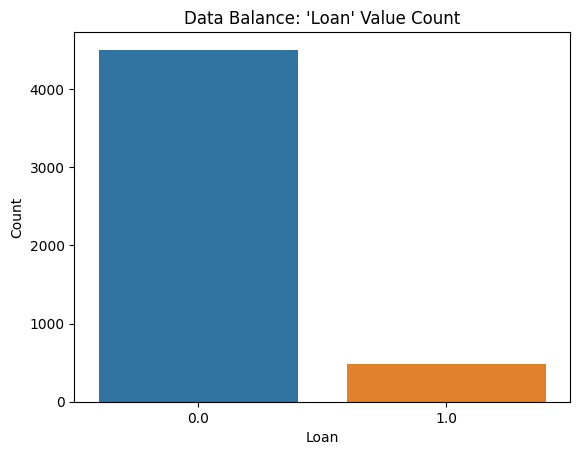

In [19]:
# class balance
print(df['Loan'].value_counts(normalize=True))
ax = sns.countplot(x=df['Loan'])
ax.set_title("Data Balance: 'Loan' Value Count")
ax.set_ylabel('Count');

The dataset is imbalanced at a ratio of 10:1 in favour of no loan ('0').

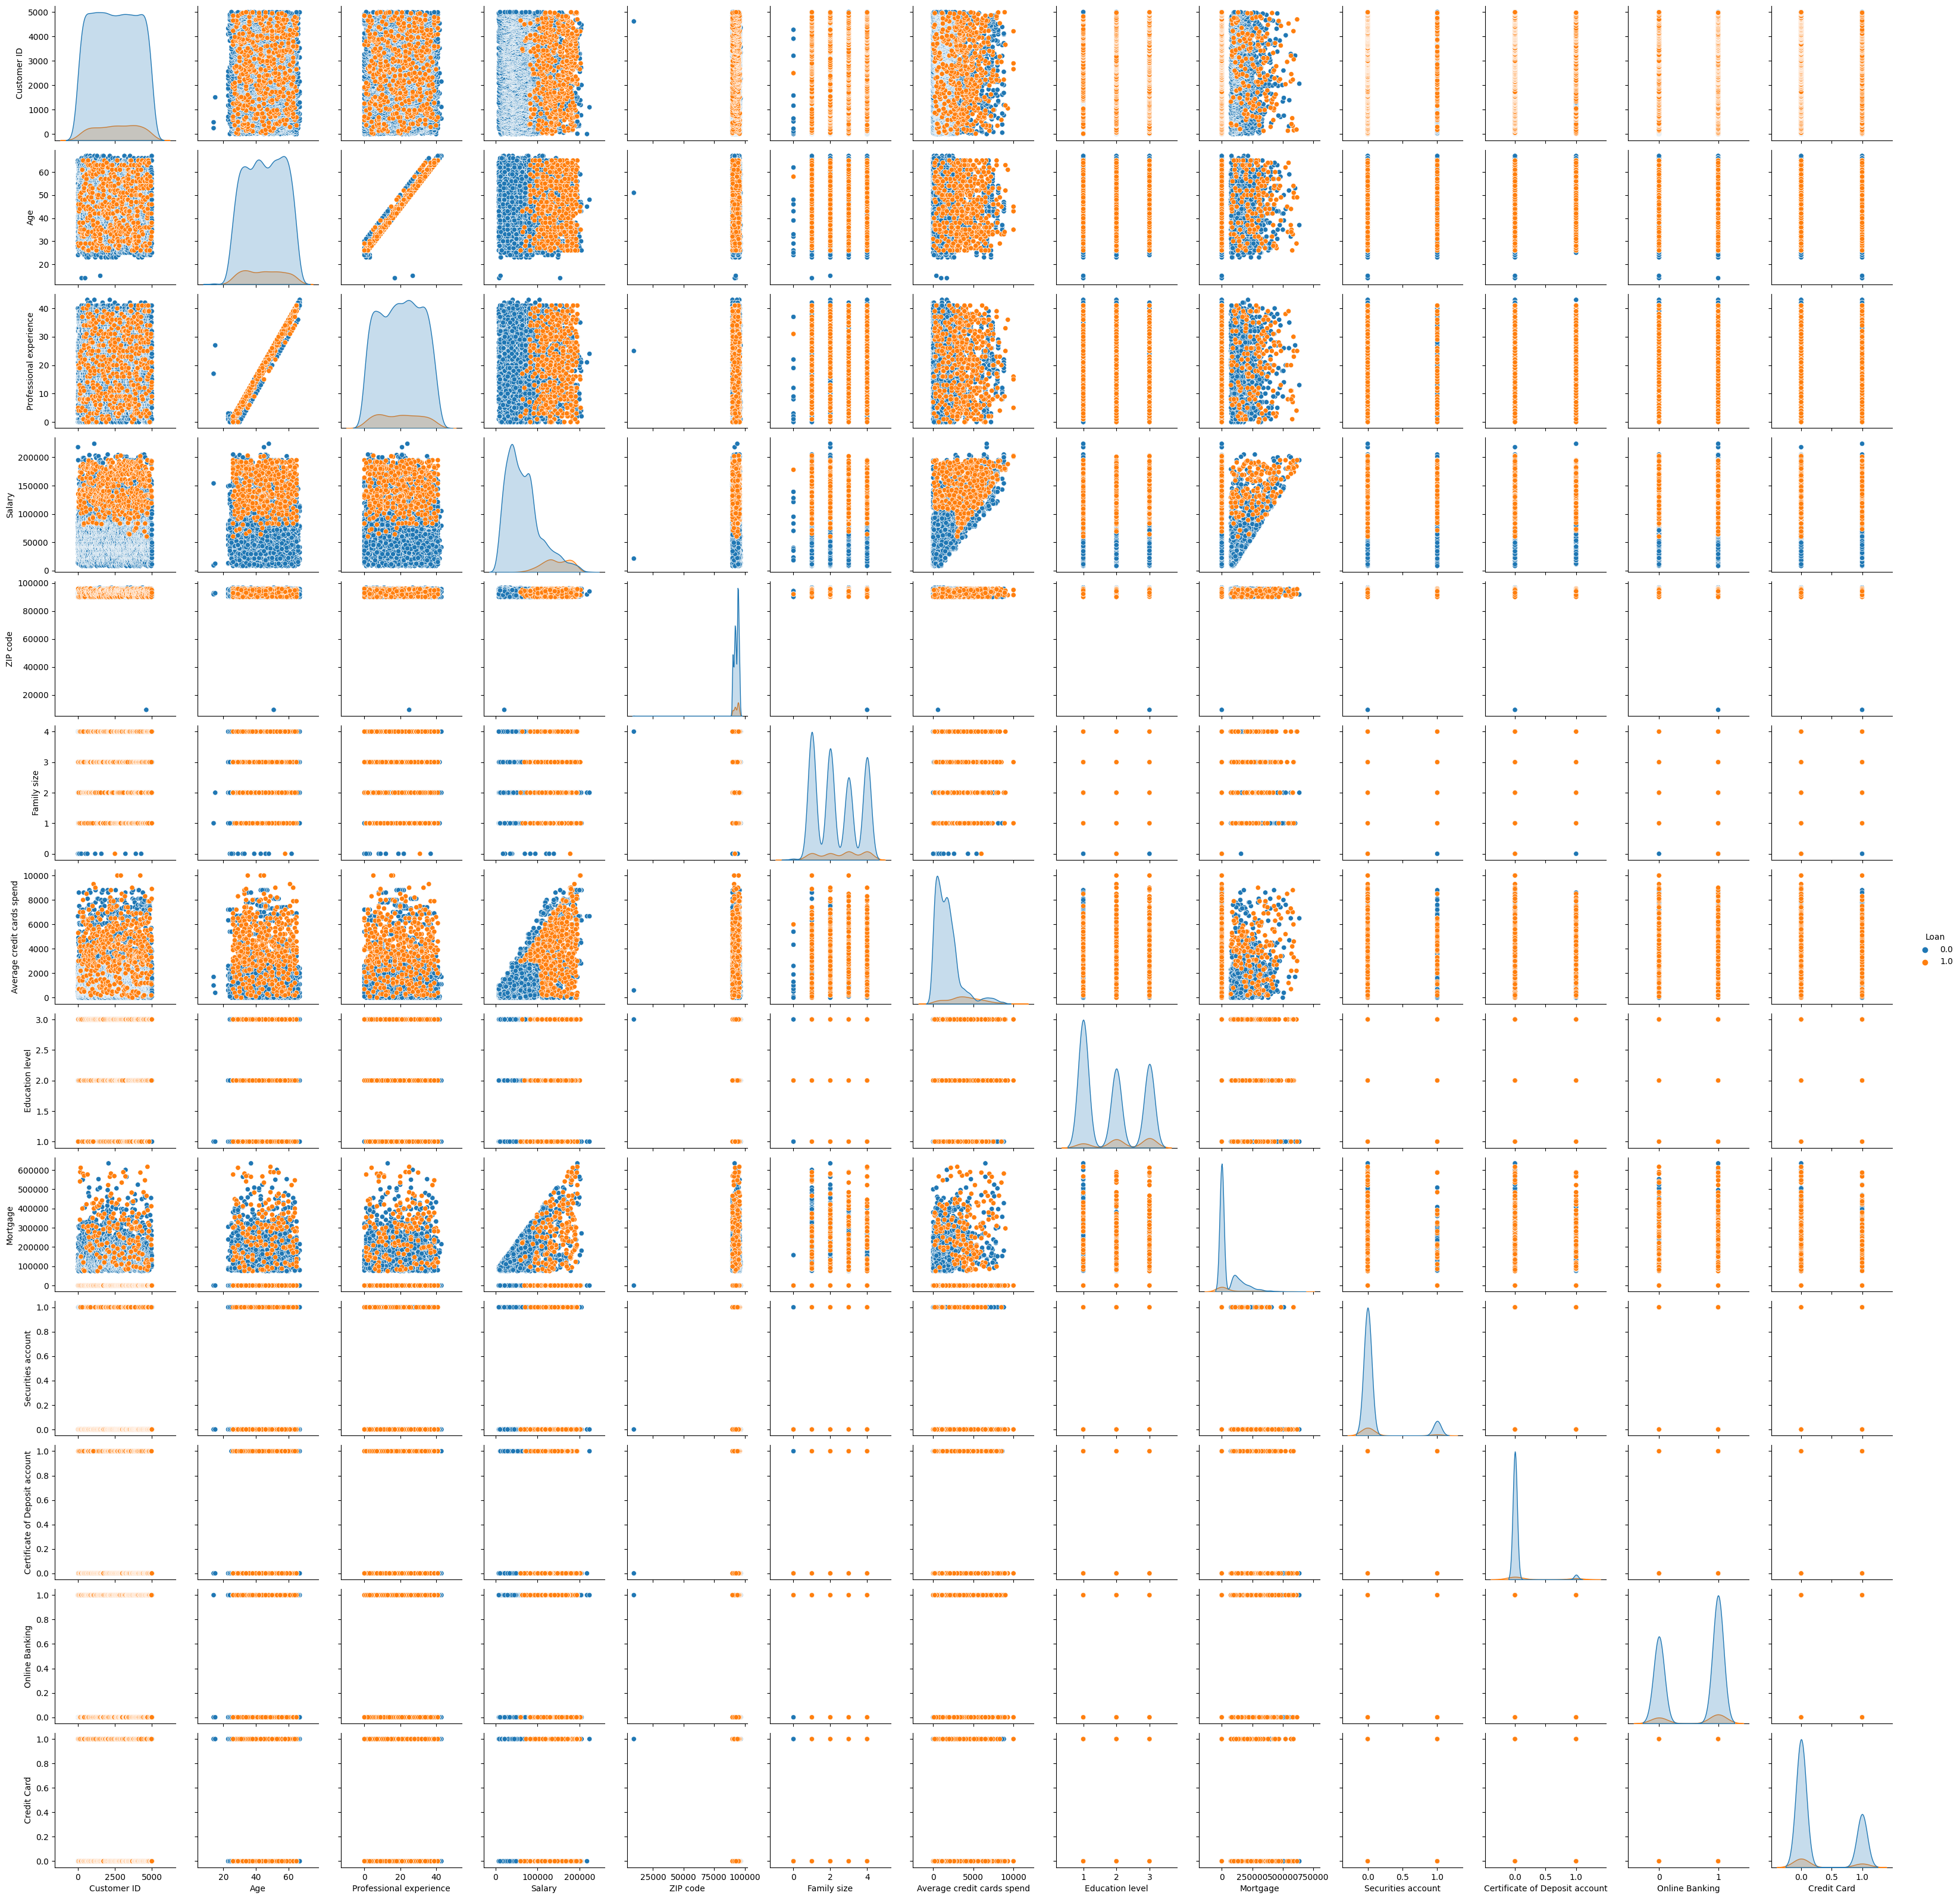

In [20]:
# feature relationships
sns.pairplot(df, hue='Loan');

In [22]:
# manually assign dtypes to certain columns
dict_types = {
    'Customer ID': 'category',
    'Age': 'int64',
    'Professional experience': 'int64',
    'Salary': 'int64',
    'ZIP code': 'category',
    'Family size': 'float64',
    'Average credit cards spend': 'float64',
    'Education level': 'category',
    'Mortgage': 'float64',
    'Loan': 'float64',
    'Securities account': 'bool',
    'Certificate of Deposit account': 'bool',
    'Online Banking': 'bool',
    'Credit Card': 'bool'
    }

df = df.astype(dict_types)

In [24]:
# check assignment
df.dtypes

Customer ID                       category
Age                                  int64
Professional experience              int64
Salary                               int64
ZIP code                          category
Family size                        float64
Average credit cards spend         float64
Education level                   category
Mortgage                           float64
Loan                               float64
Securities account                    bool
Certificate of Deposit account        bool
Online Banking                        bool
Credit Card                           bool
dtype: object

In [25]:
# get names of numeric and categorical columns
num_ix = df.select_dtypes(include=['int64', 'float64']).columns
cat_ix = df.select_dtypes(include=['category', 'bool']).columns

In [26]:
print(num_ix)
print(cat_ix)

Index(['Age', 'Professional experience', 'Salary', 'Family size',
       'Average credit cards spend', 'Mortgage', 'Loan'],
      dtype='object')
Index(['Customer ID', 'ZIP code', 'Education level', 'Securities account',
       'Certificate of Deposit account', 'Online Banking', 'Credit Card'],
      dtype='object')


### Numeric Distributions

Examine the distributions of numeric columns.

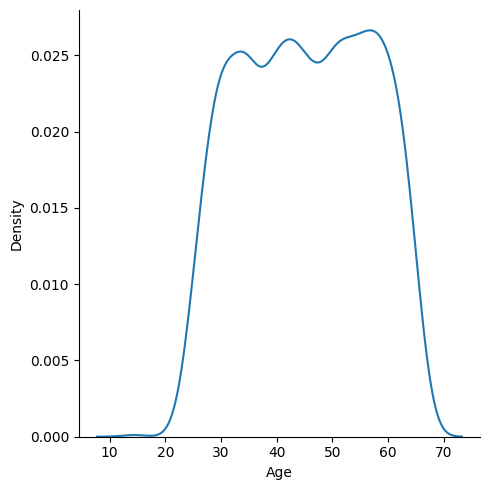

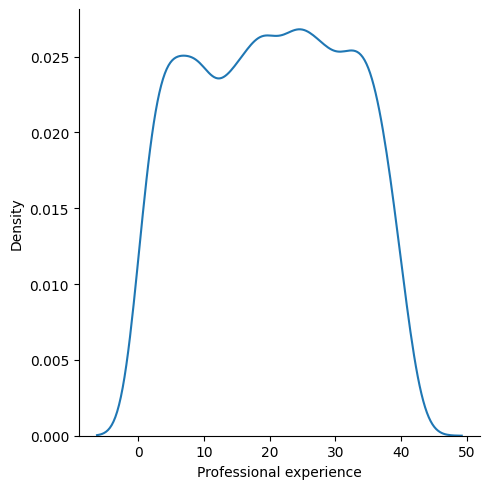

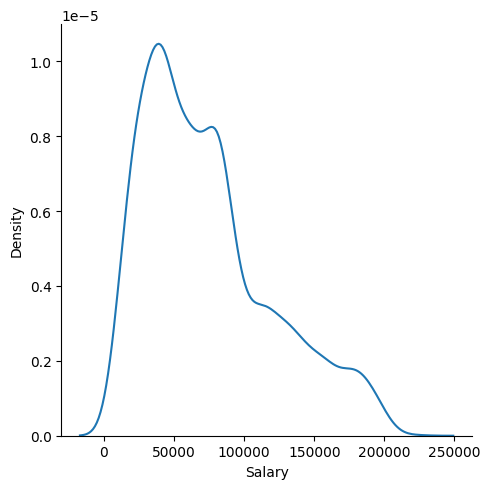

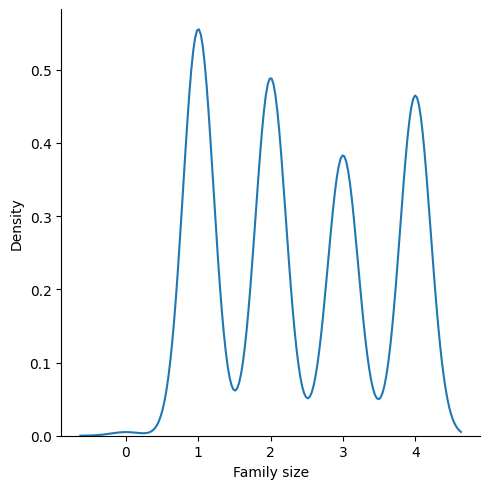

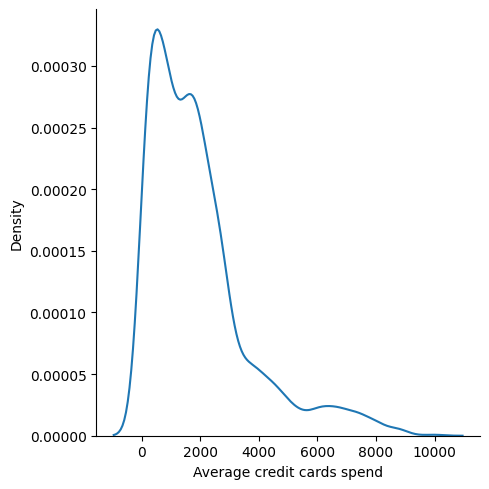

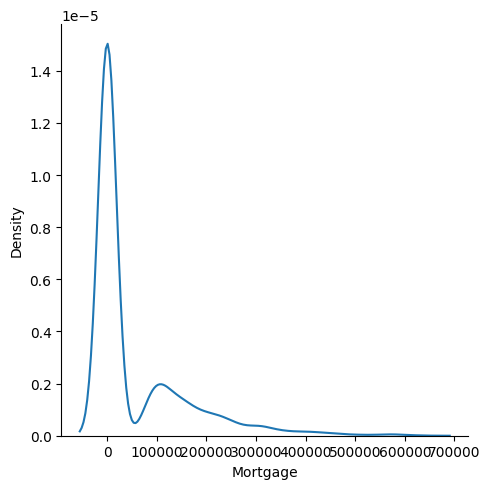

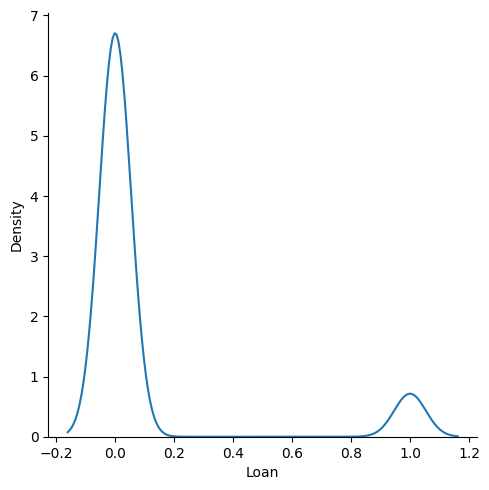

In [27]:
for i in num_ix:
    sns.displot(df[i], kind='kde')

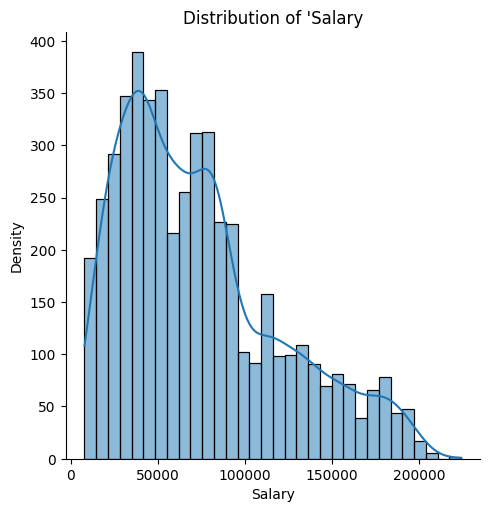

In [28]:
ax = sns.displot(data = df, x='Salary', kde=True).set(
    title="Distribution of 'Salary")
ax.set_ylabels("Density");

### Categorical Distributions

Examine the countplots of categorical columns.

<AxesSubplot: xlabel='Education level', ylabel='count'>

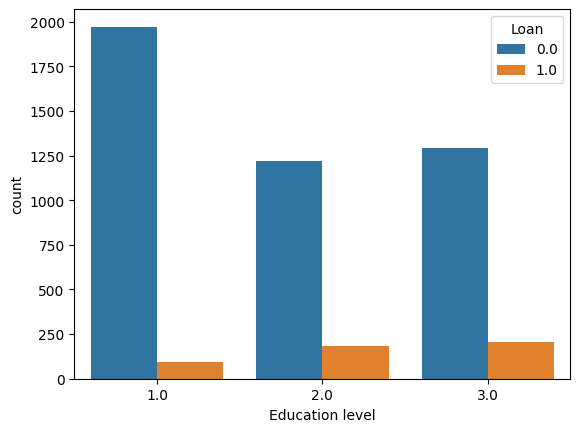

In [29]:
sns.countplot(data=df, x='Education level', hue='Loan')

<AxesSubplot: xlabel='Securities account', ylabel='count'>

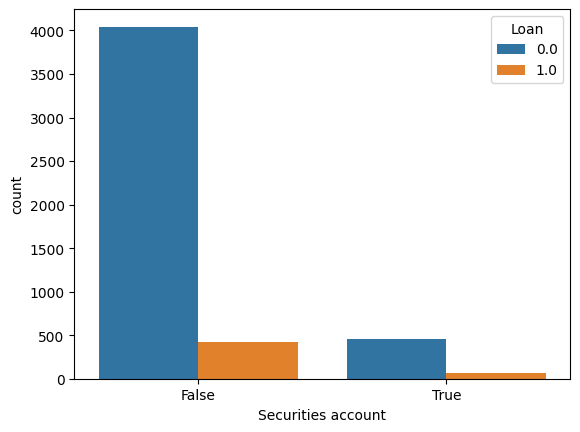

In [30]:
sns.countplot(data=df, x='Securities account', hue='Loan')

<AxesSubplot: xlabel='Certificate of Deposit account', ylabel='count'>

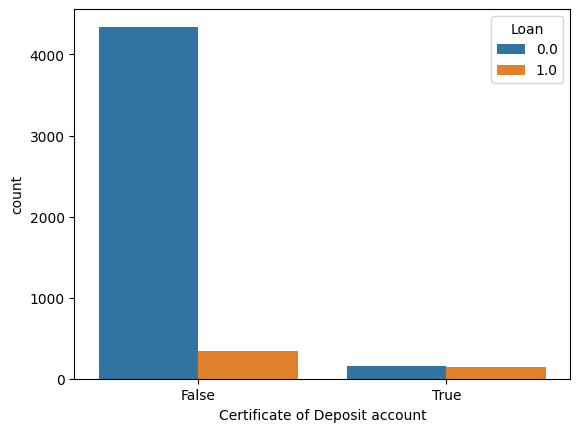

In [31]:
sns.countplot(data=df, x='Certificate of Deposit account', hue='Loan')

<AxesSubplot: xlabel='Online Banking', ylabel='count'>

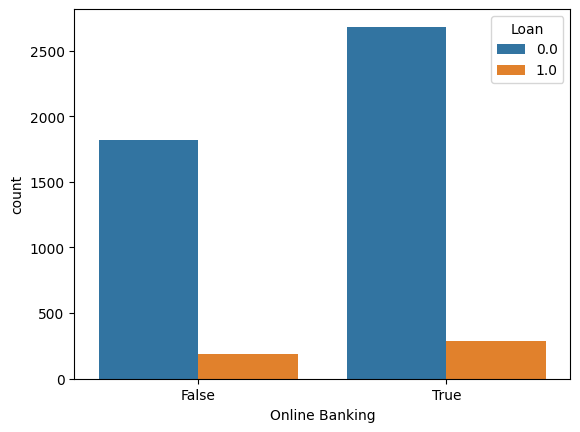

In [32]:
sns.countplot(data=df, x='Online Banking', hue='Loan')

<AxesSubplot: xlabel='Credit Card', ylabel='count'>

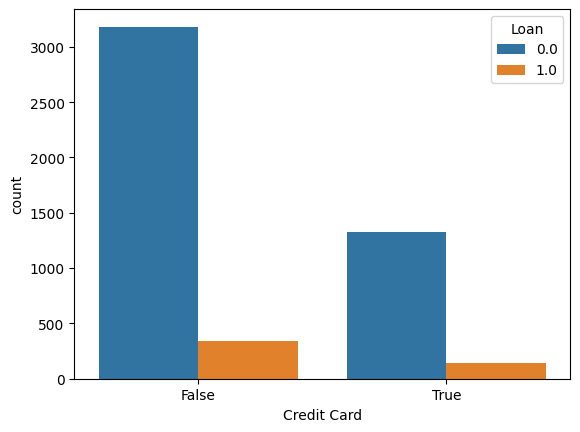

In [33]:
sns.countplot(data=df, x='Credit Card', hue='Loan')

## Save Cleansed Dataset

Save cleansed dataset for modelling.

In [35]:
df.to_csv('../data/preprocessed/preprocessed_data.csv', index=None)